In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

In [2]:
def sub_Dict():
    sub_Dict = dict({99: ['797','806','809','826','843','845','855','856','857'], 
                 114: ['1031','1153','1154','1157','1174','1262','1264','1266',
        '1364','1367','1379','1380','1381','1384','1435','1465','1467','1468','1489','1492','1493','1494','1495','1498','1519',
        '1520','1527','1532','1536','1541','1721','1722','1737','1741','1788','1791','1810','1812','1833','1934'],
        177:['2310','2316','2318','2323','2338','2339','2340','2348','2353','2356','2357','2358','2377',
            '2378','2381','2383','2385','2386','2387','2388','2389','2390','2391','2394','2395','2396','2399',
            '2401','2402','2404','2405','2407','2434','2444','2456',
             '2433','2447','2477','2479','2489','2547','2548','2549','2553','2555','2558','2559','2578','2951','2958',
            '2961','2962','2963','2964','2967','2968','2975','2977','2978','2981','2983',
             '2998','2999','3051','3052','3053']}) 
    return sub_Dict

def GetCohort(subID):
    subDict = sub_Dict()
    for key, value in subDict.items():
        if subID in value:
            return key
        
def subID_list():
    subID = ['797','806','809','826','843','845','855','856','857','1031','1153','1154','1157','1174','1262','1264','1266',
        '1364','1367','1379','1380','1381','1384','1435','1465','1467','1468','1489','1492','1493','1494','1495','1498','1519',
        '1520','1527','1532','1536','1541','1721','1722','1737','1741','1788','1791','1810','1812','1833','1934',
            '2310','2316','2318','2323','2338','2339','2340','2348','2353','2356','2357','2358','2377','2378',
             '2381','2383','2385','2386','2387','2388','2389','2390','2391','2394','2395','2396','2399',
             '2401','2402','2404','2405','2407','2434','2444','2456',
            '2433','2447','2477','2479','2489','2547','2548','2549','2553','2555','2558','2559','2578','2951','2958',
            '2961','2962','2963','2964','2967','2968','2975','2977','2978','2981','2983',
             '2998','2999','3051','3052','3053']
    return subID

def censored_subID_list():
    subID = ['797','806','809','826','845','855','1153','1154','1157','1174','1262','1264','1266',
        '1364','1367','1379','1380','1384','1467','1468','1489','1494','1495','1498',
        '1527','1532','1536','1541','1722','1737','1741','1788','1791','1810','1812','1833','1934',
            '2310','2316','2318','2323','2338','2339','2348','2353','2356','2357','2358','2377',
             '2381','2383','2385','2386','2388','2389','2390','2391','2394','2395','2396','2399',
             '2402','2404','2405','2407','2434','2456',
            '2433','2477','2479','2489','2547','2548','2549','2553','2555','2558','2559','2578','2951','2958',
            '2961','2962','2963','2964','2967','2968','2975','2977','2978','2981','2983',
             '2998','2999','3051','3052']
    return subID

def z_score_weekly_activity(data,subID):
    scaler = StandardScaler()
    scaler.fit(data.iloc[:,1:].T)
    z_score_data = pd.DataFrame(scaler.transform(data.iloc[:,1:].T).T)
    z_score_data.insert(0,'subID',subID)
    return z_score_data

## Princical component 

In [3]:
pc3_all = pd.read_csv("/Users/zyy219/Dropbox/Risk_project/Data/Weekly_measurement/pc3_score_cencored.csv")
week_list = ['week1','week2','week3','week4','week5','week6','week7','week8']
for col in week_list:
    
    pc3_all.loc[pc3_all[col]>100, col] = 100
    pc3_all.loc[pc3_all[col]<-100,col] = -100
pc3_all = pc3_all.drop(columns = 'Unnamed: 0')
pc3_reversed = pc3_all.iloc[:, ::-1]

## Activity tracker

In [5]:
R = ['843','856','857','1031','1381','1435','1465','1492',
     '1493','1519','1520','1721','2340','2378','2387','2401','2444','2447','3053']

R = [843,856,857,1031,1381,1435,1465,1492,
     1493,1519,1520,1721,2340,2378,2387,2401,2444,2447,3053]

sleep_177 = pd.read_csv("/Users/zyy219/Documents/Risk_project/Data/Weekly_measurement/sleep_weekly_177.csv")
sleep_114 = pd.read_csv("/Users/zyy219/Documents/Risk_project/Data/Weekly_measurement/sleep_weekly_114.csv")
sleep_99 = pd.read_csv("/Users/zyy219/Documents/Risk_project/Data/Weekly_measurement/sleep_weekly_99.csv")
sleep_all = pd.concat([sleep_99,sleep_114, sleep_177])
sleep_all = sleep_all[~sleep_all['Unnamed: 0'].isin(R)]
sleep_reversed = sleep_all.iloc[:, ::-1]

In [6]:
df_list = []
nan_list = [np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan]
label = ['sleep_t-1','sleep_t-2','sleep_t-3','sleep_t-4','sleep_t-5','sleep_t-6','sleep_t-7']
vac = ['pc_t-1','pc_t-2','pc_t-3','pc_t-4','pc_t-5','pc_t-6','pc_t-7']

for n in range(96):
    df = pd.DataFrame({'subID':sleep_all.iloc[n][0],'const':np.ones(7),'sleep_t-1' : nan_list,'sleep_t-2' : nan_list,'sleep_t-3' : nan_list,'sleep_t-4' : nan_list,'sleep_t-5' : nan_list,
                 'sleep_t-6' : nan_list,'sleep_t-7' : nan_list,'pc_t-1' : nan_list,'pc_t-2' : nan_list,'pc_t-3' : nan_list,
                  'pc_t-4' : nan_list,'pc_t-5' : nan_list,'pc_t-6' : nan_list,'pc_t-7' : nan_list,'Y':nan_list},index=['t-1', 't-2', 't-3' , 't-4' , 't-5' ,'t-6','t-7' ])

    for i in range(7):
        df[label[i]].iloc[0:7-i] = sleep_reversed.iloc[n][1+i:8].tolist()
        df[vac[i]].iloc[0:7-i] = pc3_reversed.iloc[n][1+i:8].tolist()
        #df[vac[i]].iloc[0:7-i] = z_score_pc3_reversed.iloc[n][1+i:8].tolist()

        df['Y'].iloc[0:7] = pc3_reversed.iloc[n][0:7].tolist()
        #df['Y'].iloc[0:7] = z_score_pc3_reversed.iloc[n][0:7].tolist()
        
    df_list.append(df)
regression_df = pd.concat(df_list)
#regression_df = regression_df[~regression_df.subID.isin(['1174','1154','1467','1468','2378'])]
regression_df = regression_df[~regression_df.subID.isin([1174,1154,1467,1468,2378])]
t_1regression = regression_df[['subID','Y','sleep_t-4','pc_t-4','sleep_t-3','pc_t-3','sleep_t-2','pc_t-2','sleep_t-1','pc_t-1']]

t_1regression = pd.get_dummies(t_1regression, columns=['subID'])


In [7]:
Y = t_1regression['Y']
X = t_1regression[t_1regression.columns[7:]]
X = sm.add_constant(X)

In [8]:
X_zscore = X
Y_zscore = (Y - Y.mean())/Y.std()
X_zscore['sleep_t-1'] = (X_zscore['sleep_t-1']-X_zscore['sleep_t-1'].mean())/X_zscore['sleep_t-1'].std()
X_zscore['pc_t-1'] = (X_zscore['pc_t-1']-X_zscore['pc_t-1'].mean())/X_zscore['pc_t-1'].std()

In [9]:
model = sm.OLS(Y_zscore,X_zscore)
results = model.fit()
results.params
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     4.814
Date:                Fri, 03 Jun 2022   Prob (F-statistic):           6.42e-32
Time:                        13:41:32   Log-Likelihood:                -721.55
No. Observations:                 644   AIC:                             1631.
Df Residuals:                     550   BIC:                             2051.
Df Model:                          93                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          4.51e-17      0.031   1.44e-15      1.000      -0.061       0.061
sleep_t-1        0.1068      0.045      2.350      0.019       0.018       0.196
pc_t-1          -0.1091      0.040     -2.709      0.007      -0.188      -0.030
subID_797.0     -0.3287      0.303     -1.086      0.278      -0.923       0.266
subID_806.0      0.0446      0.302      0.148      0.883      -0.548       0.637
subID_809.0     -0.0674      0.302     -0.223      0.824      -0.661       0.526
subID_826.0     -0.5065      0.302     -1.678      0.094      -1.100       0.086
subID_845.0      0.4323      0.304      1.422      0.156      -0.165       1.029
subID_855.0      1.0004      0.304      3.289      0.001       0.403       1.598
subID_1153.0     0.9693      0.304      3.187      0.002       0.372       1.567
subID_1157.0     0.1900      0.302      0.629      0.530      -0.403       0.783
subID_1262.0    -0.5273      0.303     -1.739      0.083      -1.123       0.068
subID_1264.0     0.4525      0.309      1.466      0.143      -0.154       1.059
subID_1266.0    -0.1327      0.303     -0.438      0.661      -0.728       0.462
subID_1364.0     0.8262      0.302      2.734      0.006       0.233       1.420
subID_1367.0     0.3739      0.304      1.232      0.219      -0.222       0.970
subID_1379.0     0.6679      0.321      2.082      0.038       0.038       1.298
subID_1380.0     0.7219      0.306      2.360      0.019       0.121       1.323
subID_1384.0     0.1589      0.305      0.521      0.602      -0.440       0.758
subID_1489.0    -0.6651      0.304     -2.189      0.029      -1.262      -0.068
subID_1494.0     0.4078      0.302      1.350      0.178      -0.186       1.001
subID_1495.0     0.7212      0.304      2.375      0.018       0.125       1.318
subID_1498.0    -0.9009      0.305     -2.957      0.003      -1.499      -0.302
subID_1527.0    -1.6722      0.307     -5.455      0.000      -2.274      -1.070
subID_1532.0     1.1131      0.306      3.643      0.000       0.513       1.713
subID_1536.0     0.4788      0.303      1.581      0.114      -0.116       1.074
subID_1541.0     0.0351      0.302      0.116      0.908      -0.559       0.629
subID_1722.0     0.7365      0.303      2.430      0.015       0.141       1.332
subID_1737.0     0.5599      0.303      1.848      0.065      -0.035       1.155
subID_1741.0     0.6074      0.303      2.003      0.046       0.012       1.203
subID_1788.0    -0.5835      0.302     -1.929      0.054      -1.178       0.011
subID_1791.0     0.6323      0.306      2.068      0.039       0.032       1.233
subID_1810.0    -0.9334      0.304     -3.068      0.002      -1.531      -0.336
subID_1812.0    -0.3337      0.303     -1.100      0.272      -0.930       0.262
subID_1833.0     0.8591      0.304      2.829      0.005       0.263       1.456
subID

In [9]:
beta1 = np.array(results.params)
X_matx = np.array(X_zscore)
y_hat = beta1.T@X_matx.T
residue = Y_zscore-y_hat
t_1regression.insert (0, "residue", residue)

t_2regression = t_1regression[['residue','sleep_t-2','pc_t-2']]
t_2regression_df = t_2regression.dropna()

In [10]:
Y1 = t_2regression_df['residue']
X1 = t_2regression_df[['sleep_t-2','pc_t-2']]

X1_zscore = X1
Y1_zscore = (Y1 - Y1.mean())/Y1.std()
X1_zscore['sleep_t-2'] = (X1_zscore['sleep_t-2']-X1_zscore['sleep_t-2'].mean())/X1_zscore['sleep_t-2'].std()
X1_zscore['pc_t-2'] = (X1_zscore['pc_t-2']-X1_zscore['pc_t-2'].mean())/X1_zscore['pc_t-2'].std()

model = sm.OLS(Y1_zscore,X1_zscore)
results = model.fit()
results.params
results.summary()

/var/folders/8k/fs12fbvs52dfyf4blh3m7gbs29v449/T/ipykernel_17445/1820993043.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1_zscore['sleep_t-2'] = (X1_zscore['sleep_t-2']-X1_zscore['sleep_t-2'].mean())/X1_zscore['sleep_t-2'].std()
/var/folders/8k/fs12fbvs52dfyf4blh3m7gbs29v449/T/ipykernel_17445/1820993043.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1_zscore['pc_t-2'] = (X1_zscore['pc_t-2']-X1_zscore['pc_t-2'].mean())/X1_zscore['pc_t-2'].std()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                residue   R-squared (uncentered):                   0.011
Model:                            OLS   Adj. R-squared (uncentered):              0.007
Method:                 Least Squares   F-statistic:                              2.986
Date:                Fri, 04 Mar 2022   Prob (F-statistic):                      0.0513
Time:                        14:38:54   Log-Likelihood:                         -779.77
No. Observations:                 552   AIC:                                      1564.
Df Residuals:                     550   BIC:                                      1572.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
sleep_t-2     -0.0169      0.042     -0.398      0.691      -0.100       0.067
pc_t-2        -0.1013      0.042     -2.386      0.017      -0.185      -0.018
==============================================================================
Omnibus:                       56.886   Durbin-Watson:                   2.201
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.438
Skew:                          -0.782   Prob(JB):                     4.16e-17
Kurtosis:                       3.913   Cond. No.                         1.06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [242]:
beta2 = np.array(results.params)
X_matx1 = np.array(X1_zscore)
y_hat1 = beta2.T@X_matx1.T
residue2 = Y1_zscore-y_hat1

regression3_df = t_1regression.drop('t-7')
regression3_df.insert (0, "residue2", residue2)
t_3regression = regression3_df[['residue2','sleep_t-3','pc_t-3']]
t_3regression_df = t_3regression.dropna()

Y2 = t_3regression_df['residue2']
X2 = t_3regression_df[['sleep_t-3','pc_t-3']]

X2_zscore = X2
Y2_zscore = (Y2 - Y2.mean())/Y2.std()
X2_zscore['sleep_t-3'] = (X2_zscore['sleep_t-3']-X2_zscore['sleep_t-3'].mean())/X2_zscore['sleep_t-3'].std()
X2_zscore['pc_t-3'] = (X2_zscore['pc_t-3']-X2_zscore['pc_t-3'].mean())/X2_zscore['pc_t-3'].std()


model = sm.OLS(Y2_zscore,X2_zscore)
results = model.fit()
results.params
results.summary()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               residue2   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.004
Method:                 Least Squares   F-statistic:                            0.06565
Date:                Wed, 01 Dec 2021   Prob (F-statistic):                       0.936
Time:                        15:12:01   Log-Likelihood:                         -652.15
No. Observations:                 460   AIC:                                      1308.
Df Residuals:                     458   BIC:                                      1317.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
sleep_t-3      0.0165      0.047      0.352      0.725      -0.075       0.108
pc_t-3        -0.0049      0.047     -0.105      0.916      -0.097       0.087
==============================================================================
Omnibus:                       52.024   Durbin-Watson:                   2.124
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.421
Skew:                          -0.829   Prob(JB):                     8.42e-16
Kurtosis:                       3.936   Cond. No.                         1.06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [243]:
beta3 = np.array(results.params)
X_matx2 = np.array(X2_zscore)
y_hat2 = beta3.T@X_matx2.T
residue3 = Y2_zscore-y_hat2

regression4_df = t_1regression.drop('t-7')
regression4_df = regression4_df.drop('t-6')
regression4_df.insert (0, "residue3", residue3)

t_4regression = regression4_df[['residue3','sleep_t-4','pc_t-4']]
t_4regression_df = t_4regression.dropna()

Y3 = t_4regression_df['residue3']
X3 = t_4regression_df[['sleep_t-4','pc_t-4']]

X3_zscore = X3
Y3_zscore = (Y3 - Y3.mean())/Y3.std()
X3_zscore['sleep_t-4'] = (X3_zscore['sleep_t-4']-X3_zscore['sleep_t-4'].mean())/X3_zscore['sleep_t-4'].std()
X3_zscore['pc_t-4'] = (X3_zscore['pc_t-4']-X3_zscore['pc_t-4'].mean())/X3_zscore['pc_t-4'].std()


model = sm.OLS(Y3_zscore,X3_zscore)
results = model.fit()
results.params
results.summary()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               residue3   R-squared (uncentered):                   0.002
Model:                            OLS   Adj. R-squared (uncentered):             -0.004
Method:                 Least Squares   F-statistic:                             0.2778
Date:                Wed, 01 Dec 2021   Prob (F-statistic):                       0.758
Time:                        15:15:37   Log-Likelihood:                         -521.39
No. Observations:                 368   AIC:                                      1047.
Df Residuals:                     366   BIC:                                      1055.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
sleep_t-4     -0.0090      0.052     -0.172      0.863      -0.112       0.094
pc_t-4        -0.0373      0.052     -0.712      0.477      -0.140       0.066
==============================================================================
Omnibus:                       45.899   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.811
Skew:                          -0.915   Prob(JB):                     1.03e-13
Kurtosis:                       3.744   Cond. No.                         1.07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

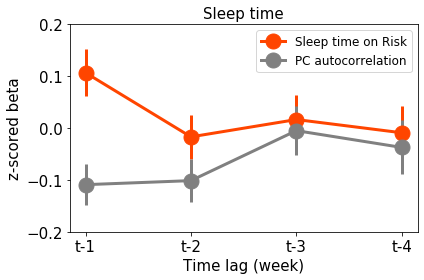

In [3]:
x = [1,2,3,4]
y = [0.1068,-0.0169,0.0165,-0.009]

# example error bar values that vary with x-position
error = [0.045,0.042,0.047,0.052]

x1 = [1,2,3,4]
y1 = [-0.1091,-0.1013,-0.0049, -0.0373]
error1 = [0.04,0.042,0.047,0.052]


plt.errorbar(x, y, yerr=error, fmt='-o',label = 'Sleep time on Risk',color = 'orangered',
             linewidth=3,elinewidth = 3,markersize = 15)

plt.xticks([1, 2, 3,4], ['t-1', 't-2', 't-3','t-4'],fontsize = 15)

plt.errorbar(x1,y1,yerr= error1,fmt='-o', label = 'PC autocorrelation',color = 'gray',
             linewidth=3,elinewidth = 3,markersize = 15)

plt.ylim(-0.2,0.2)
plt.yticks(fontsize=12)
plt.xticks([1, 2, 3,4], ['t-1', 't-2', 't-3','t-4'],fontsize = 15)
plt.yticks([-0.2,-0.1,0,0.1,0.2],fontsize = 15)
plt.xlabel('Time lag (week)',fontsize = 15)
plt.ylabel('z-scored beta',fontsize = 15)
plt.title('Sleep time', fontsize = 15)
plt.legend(fontsize = 12)
plt.tight_layout()
plt.savefig('beta_sleep_zscore.png',dpi=1000)